# **LAB 3 - PART 1 SVM Kernel Hard Prediction**

In [424]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### **Read csv file**

In [425]:
### START CODE HERE ###
df = pd.read_csv('./data_sample.csv')
### END CODE HERE ###
df.columns = ['Target', 'Radius', 'Texture']

#### **Split the data for Train and Test**
First 5 rows for train and the rest for test.

In [426]:
### START CODE HERE ###
train = df.iloc[0:5, :]
test = df.iloc[5:8, :]
### END CODE HERE ###
train


,Target,Radius,Texture
0,1,2.5,4.1
1,0,1.2,3.8
2,1,5.0,1.4
3,0,3.1,2.9
4,1,4.3,5.2


Split targets and feature as y and x respectively.
- `y` : `Target`
- `x` : `Radius,Texture`

In [427]:
### START CODE HERE ###
x_train = train[['Radius', 'Texture']]
y_train = train['Target']

x_test = test[['Radius', 'Texture']]
y_test = test['Target']

### END CODE HERE ###
y_train

0    1
1    0
2    1
3    0
4    1
Name: Target, dtype: int64

### **Create and observe the kernel behavior**

Here is the kernel function.
$$K_i(x_j,x_i) = exp(-\gamma||x_j-x_i||^2)$$
After obtaining the kernel values, you will perform a 3D visualization of $(x_1,x_2,K_i)$.

**Create the function that return all kernels as a list.**

In [428]:
def matrix_calculate_kernel(x,x_train):
    ### START CODE HERE ###
    kernels = np.zeros((x.shape[0], x_train.shape[0]))
    gamma = 1
    x = np.array(x)
    x_train = np.array(x_train)
    for i in range(x.shape[0]):
        for j in range(x_train.shape[0]):
            kernels[i][j] = np.exp(-gamma * np.linalg.norm(x[i] - x_train[j]) ** 2)
    ### END CODE HERE ###
    return kernels




<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

It is not necessary to print the output like this. Simply compare the values obtained with the expected results.
- Kernel 1 :`[1.00000000e+00 1.68638147e-01 1.31720301e-06 1.65298888e-01 1.16785670e-02]`
- Kernel 2 :`[1.68638147e-01 1.00000000e+00 1.68752986e-09 1.20342323e-02 9.44523667e-06]`
- Kernel 3 :`[1.31720301e-06 1.68752986e-09 1.00000000e+00 2.85124368e-03 3.28082741e-07]`
- Kernel 4 :`[0.16529889 0.01203423 0.00285124 1.         0.00119453]`
- Kernel 5 :`[1.16785670e-02 9.44523667e-06 3.28082741e-07 1.19453296e-03 1.00000000e+00]`

</details>



In [429]:
kernel = matrix_calculate_kernel(x_train,x_train)
for i in range(kernel.shape[0]):
    print(f'kernel {i+1} = {kernel[i]}')


kernel 1 = [1.00000000e+00 1.68638147e-01 1.31720301e-06 1.65298888e-01
 1.16785670e-02]
kernel 2 = [1.68638147e-01 1.00000000e+00 1.68752986e-09 1.20342323e-02
 9.44523667e-06]
kernel 3 = [1.31720301e-06 1.68752986e-09 1.00000000e+00 2.85124368e-03
 3.28082741e-07]
kernel 4 = [0.16529889 0.01203423 0.00285124 1.         0.00119453]
kernel 5 = [1.16785670e-02 9.44523667e-06 3.28082741e-07 1.19453296e-03
 1.00000000e+00]


Use the weight ($\theta_{1-n}$) and bias ($\theta_{0}$) base on your activity last.

In [430]:
kernels_train = matrix_calculate_kernel(x_train,x_train)
### START CODE HERE ###
w = np.array([2,-5,3,-2,-1])
# w = np.array([0.2, 0.4, 0.1, -0.2, 0.6])
b = 1
### END CODE HERE ###

Create the `compare_3dplot` function to plot difference raw kernels $(x_1,x_2,K_i)$ and weighted kernels $(x_1,x_2,\theta_i K_i)$.<br>
**NOTE** : Plot as subplots, and in each subplot, also plot $(x_1,x_2,0)$  with a different color to visualize the $(x_1,x_2)$ before applying the kernel.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- There is a parameter : `projection='3d'`
</details>

<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

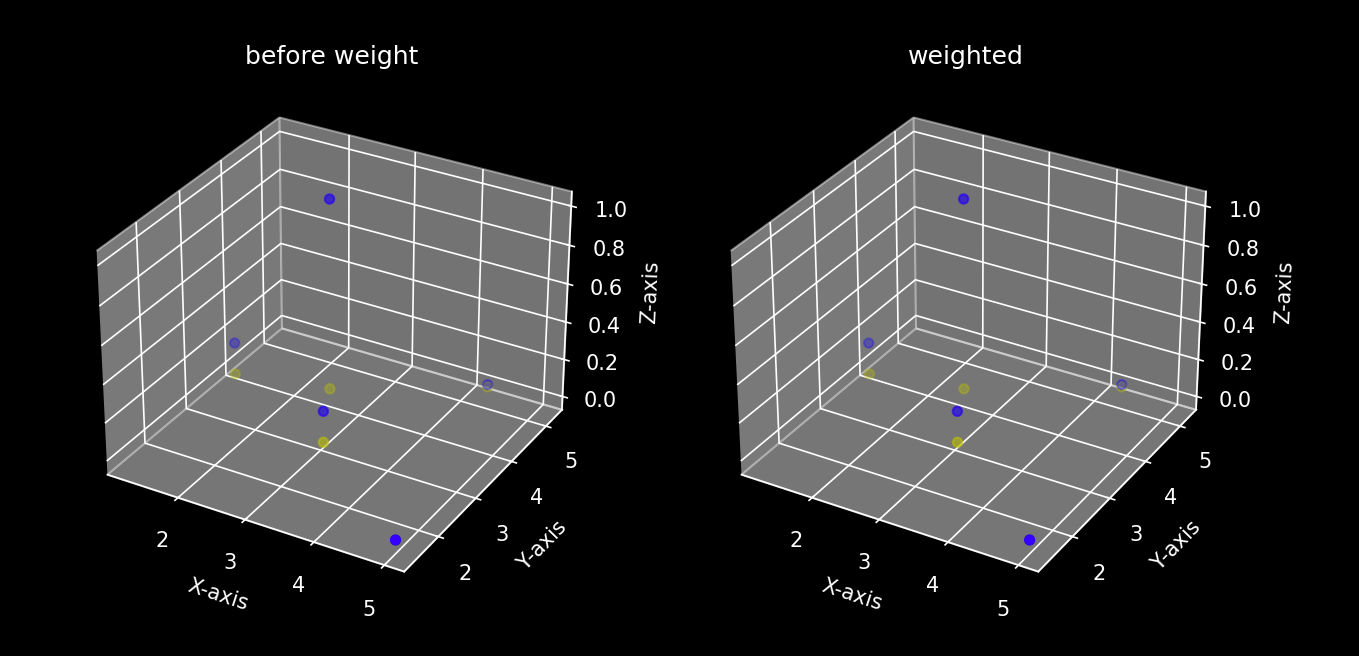

</details>


In [431]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
def compare_3dplot(x_train, kernels, w):
    """
    Parameters:
    - x_train (numpy.ndarray): The input training data.
    - kernels (numpy.ndarray): The array of kernel values.
    - w (float): The weight parameter.
    """
    fig = plt.figure(figsize=(12, 6))

    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')

    # Plot before applying the kernel
    ax1.scatter(x_train['Radius'], x_train['Texture'], np.zeros_like(x_train['Radius']), c='g', marker='o', label='(x1, x2, 0)')
    ax1.scatter(x_train['Radius'], x_train['Texture'], kernels, c='r', marker='o', label='(x1, x2, Target)')
    ax1.set_xlabel('Radius')
    ax1.set_ylabel('Texture')
    ax1.set_zlabel('Kernel')
    ax1.set_title('before weight')
    ax1.legend()

    # Plot after applying the kernel
    ax2.scatter(x_train['Radius'], x_train['Texture'], np.zeros_like(x_train['Radius']), c='g', marker='o', label='(x1, x2, 0)')
    ax2.scatter(x_train['Radius'], x_train['Texture'], np.dot(kernels, w) + b, c='b', marker='o', label='(x1, x2, Weighted)')
    ax2.set_xlabel('Radius')
    ax2.set_ylabel('Texture')
    ax2.set_zlabel('weighted Kernel')
    ax2.set_title('weighted')
    ax2.legend()

    plt.show()


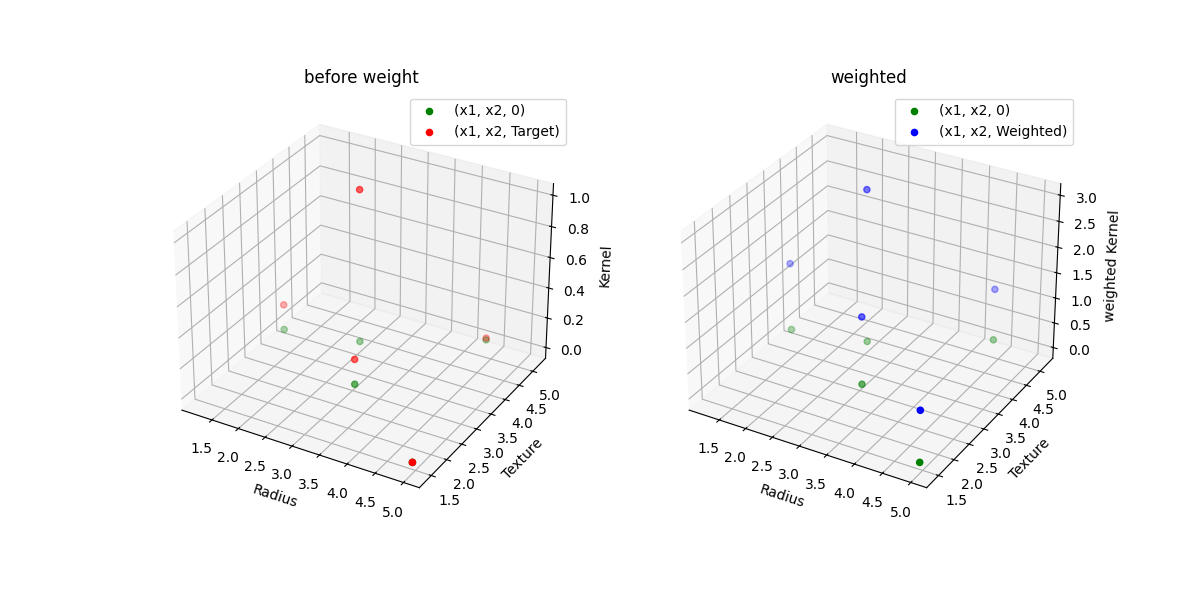

In [432]:
compare_3dplot(x_train,kernels_train[0],w[0])

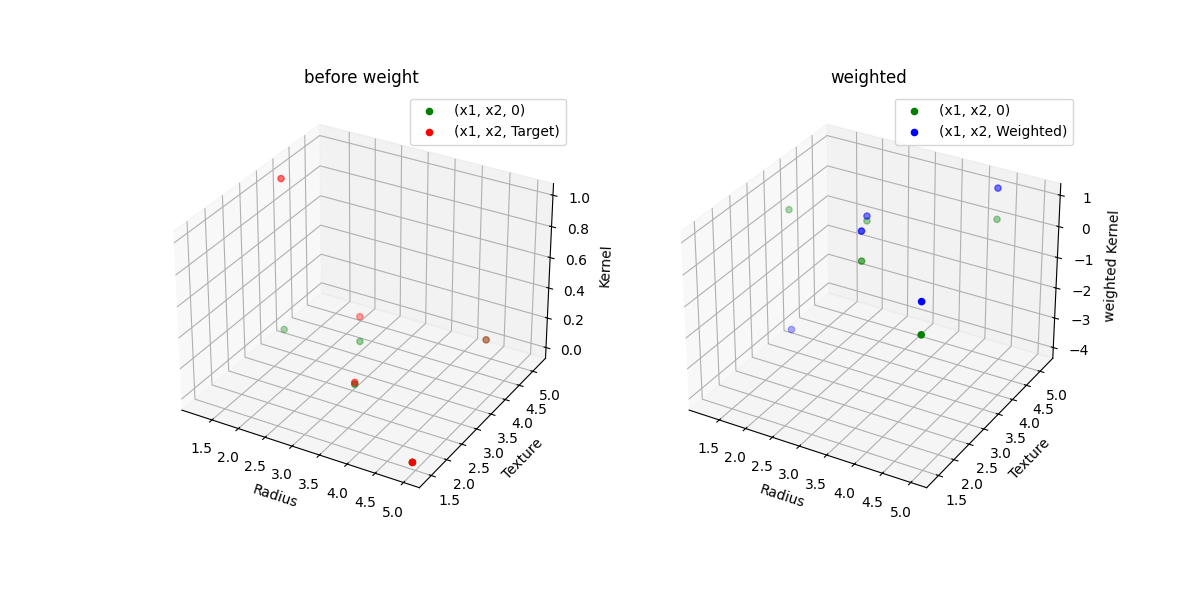

In [433]:
compare_3dplot(x_train,kernels_train[1],w[1])

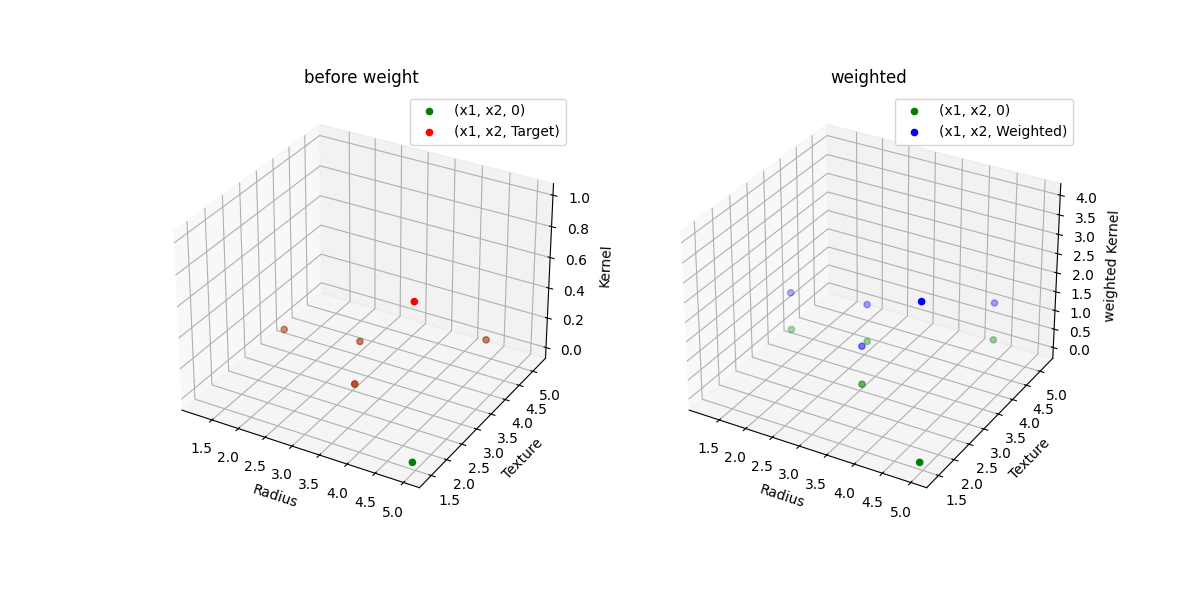

In [434]:
compare_3dplot(x_train,kernels_train[2],w[2])

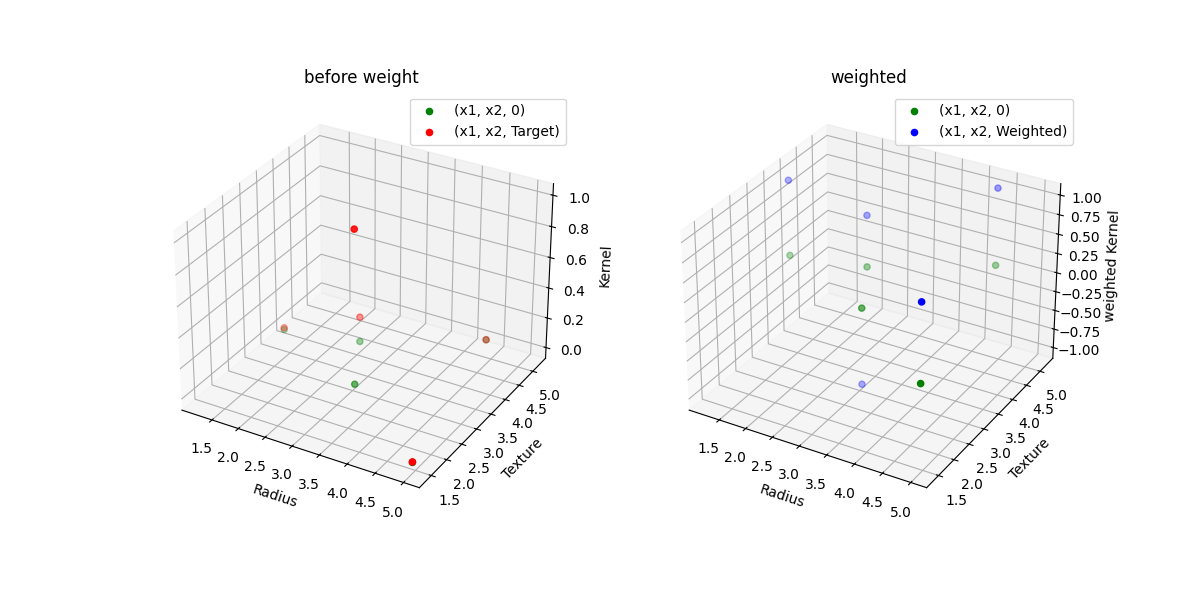

In [435]:
compare_3dplot(x_train, kernels_train[3], w[3])

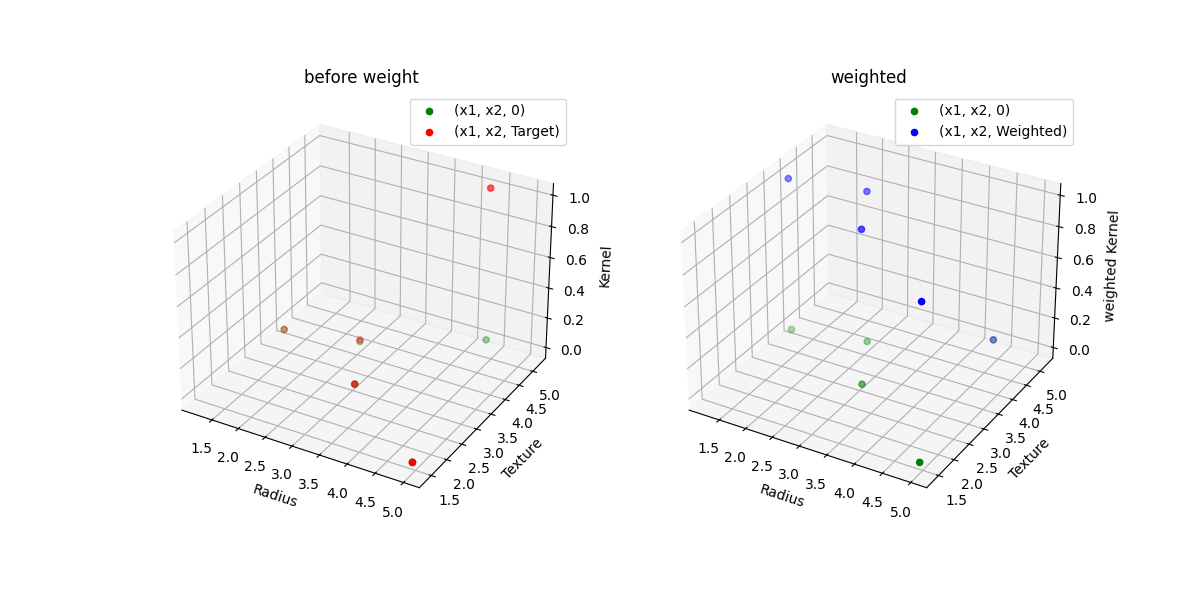

In [436]:
compare_3dplot(x_train,kernels_train[4],w[4])

### **SVM decision function**
Create the SVM decision function that return the predicted class.
$$
K_i(x_j,x_i) = exp(-\gamma||x_j-x_i||^2) \\
h(X) = \sum_{i=1}^N\theta_i K_i + \theta_0\\

\hat{Y} =
\begin{cases}
    1 &  h \geq 0 \\
    0 & \text{otherwise}
\end{cases}

$$


In [437]:
print(x_test)
print(x_train)
print(w)

   Radius  Texture
5     3.8      6.1
6     2.8      4.2
7     2.2      3.4
   Radius  Texture
0     2.5      4.1
1     1.2      3.8
2     5.0      1.4
3     3.1      2.9
4     4.3      5.2
[ 2 -5  3 -2 -1]


In [438]:
def svm_decision_function(x, x_train, w, b, gamma=1):
    """
    Predict the class of the input x using an SVM decision function.

    Parameters:
    - x (numpy.ndarray): The input data for prediction.
    - x_train (numpy.ndarray): The training data.
    - w (numpy.ndarray): The weight vector.
    - b (float): The bias term.
    - gamma (float): The gamma parameter for the RBF kernel (default is 1).

    Returns:
    - int: The predicted class (0 or 1).
    """
    ### START CODE HERE ###
    kernels = np.zeros((x.shape[0], x_train.shape[0]))
    x = np.array(x)
    x_train = np.array(x_train)
    for i in range(x.shape[0]):
        for j in range(x_train.shape[0]):
            kernels[i][j] = np.exp(-gamma * np.linalg.norm(x[i] - x_train[j]) ** 2)
    
    y_pred = [np.dot(kernel, w) + b for kernel in kernels]
    y_pred = [1 if y >= 0 else 0 for y in y_pred]
    return y_pred


### **Confusion matrix**
Create the confusion matrix from your prediction. Then, calculate the precision and recall values.<br><br>
<span style='color: red;'>**NOTE** : From scratch only.</span>


|            | Predicted Negative | Predicted Positive |
|------------|--------------------|--------------------|
| **Actual Negative** | True Negative (TN) | False Positive (FP) |
| **Actual Positive** | False Negative (FN) | True Positive (TP) |


$\text{Precision} = \frac{TP}{TP + FP}$

$\text{Recall} = \frac{TP}{TP + FN}$

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.</br>

```
Confusion Matrix:
[[1 0]
[0 2]]
Precision: 1.0
Recall: 1.0
```

</details>

In [439]:
y_pred = svm_decision_function(x_test, x_train, w, b)
y_pred = np.array(y_pred)
y_test = np.array(y_test)


def gen_confustion_matrix(numbers_of_class, predicted_val, actual_val):
    confusion_matrix = np.zeros((numbers_of_class, numbers_of_class))
    for i in range(len(predicted_val)):
        confusion_matrix[actual_val[i]][predicted_val[i]] += 1
    return confusion_matrix
confusion_matrix = gen_confustion_matrix(2, y_pred, y_test)
print(f'confusion matrix = \n{confusion_matrix}')

precision = confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[0][1])
recall = confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[1][0])
print(f'precision = {precision}')
print(f'recall = {recall}')
### END CODE HERE ###  

confusion matrix = 
[[1. 0.]
 [0. 2.]]
precision = 1.0
recall = 1.0


### Question
1. What would happen if we choose fewer support vectors (number of kernels)?
2. If weights are changed to w = [0.2, 0.4, 0.1, -0.2, 0.6], what impact would this have on the classification results, and what is the underlying reason for the changes? 


1. การลดจำนวน support vector อาจทำให้การทำ classification มีความถูกต้องมากขึ้น หรือลดลงก็ได้ ทั้งนี้ขึ้นข้อมูลที่พิจารณา ซึ่งถ้าหากข้อมูลที่พิจารณาสามารถจัดกลุ่มได้อย่างชัดเจนในบางมุมมอง หรือมุมมองที่มองผ่าน kernel มีความสำคัญหรือไม่ ซึ่งถ้าหาก kernel ดังกล่าวมีความสำคัญในการนำไปพิจารณาข้อมูล เช่นนั้นการรวม kernel ดังกล่าวเข้าไปพิจารณาด้วยก็จะทำให้การจัดกลุ่มมีความแม่นยำมากขึ้น กลับกันหากไม่นำไปใช้ก็จะทำให้ความแม่นยำในการจัดกลุ่มลดลง
้
2. จากรูปด้านล่าง จะเห็นได้ว่าการเปลี่ยนชุด weight ที่ใช้ทำให้ค่า precision ลดลง แต่ค่า recall ยังคงเท่าเดิม นั่นแสดงให้เเห็นว่า ค่า weight ในชุด weight ชุดใหม่ ไม่เหมาะสมที่จะใช้สำหรับการทำ classification กับข้อมูลชุดนี้ เนื่องจากความถูกต้องในการจัดกลุ่มลดลงอย่างชัดเจน


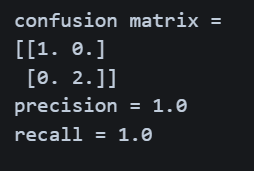

weight เดิม

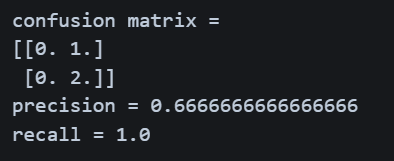

weight ใหม่